# Graph traversal using Dijkstra algorithm and Spanning Tree 

In [1]:
import math
import networkx as nx
import matplotlib.pyplot as plt
import sys
from time import perf_counter
import timeit

## Graph traversal

### Draw Graph

<img src="files/images/graph.JPG">

### DFS traversal
**starting at vertex 1**

$Nodes\ Visited$: ('1', '2'), ('2', '3'), ('3', '4'), ('4', '6'), ('6', '5'), ('5', '7'), ('7', '8')<br>
$Traversal$ : ['1','2','3','4','6','5','7','8']

BFS works on principal “Traversal by leaves”.The algorithm starts at the root node and tries to go as deep as possible in a branch till it starts backtracking. To ensure that neighbour from same rank is not traversed till depths are scanned, stack data structure is used.<br>

$Algorithm$<br>
* Pick start vertex n and end vertices[i.e. all remaining connected vertices]
* Initialise empty stack and assign it to to_visit list
* Add n to to_visit
* while to_visit is not empty do:
    * pop “to_visit” into current
    * push all unvisited neightbours of current on to_visit

### BFS traversal
**starting at vertex 1**

BFS works on principal “Traversal by rank”. Staring from a node assigned as root node, its neighbours are traversed in sequence successively. To ensure that neighbour from lower rank is not traversed, queue data structure is used.<br>

$Algorithm$
* Pick start vertex n and end vertices[i.e. all remaining connected vertices]
* Enqueue n to list “to visit”, initialise list “visited’
* Repeat until “to visit” is not empty:
    * Dequeue “to visit” into current
    * Enqueue nCurrent into “visited”
    * For each neighbour nNeightbour of nCurrent which is not in “visited” do:
        * Enqueue nNeightbour to “to visit”

$Nodes\ Visited$: ('1', '2'), ('1', '3'), ('1', '4'), ('4', '6'), ('6', '5'), ('6', '7'), ('5', '8')<br>
$Traversal$ : ['1','2','3','4','6','5','7','8']

### Conclusion
* DFS and BFS traversal for this case are same
* Though visited node order is same, branches with which nodes are accessed are clearely different and it is evident that this happened due to clustering in graph

<br><br>

## Dijkstra Algorithm

### Apply Dijkstra's algorithm to find shortest path
$PROBLEM$<br>

* Apply Dijkstra's algorithm to find the shortest path in the given graph.
* Run algorithm starting at node $A$ and terminating on node $G$
* At each step :
    * Indicate nodes visited till then
    * Indicate path value between start node (A) and current node calculated till then
    * What are best known path for all visible nodes till then
<img src="files/images/problemGraph.JPG">    
<br>

$ALGORITHM$<br>

function dijkstra:<br>
Input: a graph G, a node n<br>
Output: each node of G gets the shortest distance from n<br>

* for each node c of G not n do
    * distance[c] $\leftarrow$  infinity
* endfor

* distance[n] $\leftarrow$  0
* current $\leftarrow$  n
* visited $\leftarrow$  {n}
* while visited does not contain all nodes of G do

    * for each node c neighbour of current and not visited do<br>
        /# is new route to neighbour better? min(|n|+|n--c| and |c|)<br>
        * distance[c] $\leftarrow$  min(distance[n] + weight(current, c),distance[c])<br>
    * endfor    
      /# set next node to search from - lowest of all non-visited<br>
    * current $\leftarrow$  non visited node with smallest value<br>
    * add current to visited<br>

* endwhile<br>

<br><br>

$SOLUTION$<br>

**FOLLOWING SOLUTION WALKS THOUGH STEPWISE EXPLORATION FOR MINIMUM DISTANCE PATH USING DIJKSTRA ALGORITHM**<br><br>
Note:<br> 
* Negative index steps [1,3,7..] are **visit steps** where an explored node with minimum weight is inducted into minimum path tree
* Positive index steps [2,4,6..] are **exploratory steps** where adjascent univisted nodes of new inducted node are viewed and their minimum distance is updated to find out nearest node
<br><br>

***Initially, all nodes are passive, with infinite minimum distance***<br>
$[1]$<br>
Algorithm starts with root node *A*; which is marked visited and its minimum distance i.e. **KNOWN PATH COST FROM SOURCE NODE** is set to 0 <br>
$[2]$<br>
All adjascent nodes to root node are explored. Node *B,H,E* are visible to *A*; hence their path costs change to weight of edge. As it turns out, nearest node is node *B*. Minimum distance paths are - <br>
A : {A} **0** ;        B : {A,B} **5** ;        H : {A,H} **8** ;        E : {A,E} **9**<br>
$[3]$<br>
Node *B* is inducted in "visited" list<br>
$[4]$<br>
Unvisited neightbours of latest node added i.e. *B* are explored. Node *C,D,H* are visible to *B*; hence their path costs changes if greater than (weight of edge + Min path cost of *B*). As it turns out, no node is nearer than previously explored node *H* to root node through node *B*. Minimum distance paths are - <br>
A : {A} **0** ;        B : {A,B} **5** ;        H : {A,H} **8** ;        E : {A,E} **9** ;        C : {A,B,C} **17** ;        D : {A,B,D} **20**<br>
$[5]$<br>
Node *H* is inducted in "visited" list<br>
$[6]$<br>
Unvisited neightbours of latest node added i.e. *H* are explored. Node *E,F,C* are visible to *H*; hence their path costs changes if greater than (weight of edge + Min path cost of *H*). As it turns out, no node is nearer than previously explored node *E* to root node through node *H*. Minimum distance paths are - <br>
A : {A} **0** ;        B : {A,B} **5** ;        H : {A,H} **8** ;        E : {A,E} **9** ;        C : {A,H,C} **15** ;        D : {A,B,D} **20** ;        F : {A,H,F} **14**<br>
$[7]$<br>
Node *E* is inducted in "visited" list<br>
$[8]$<br>
Unvisited neightbours of latest node added i.e. *E* are explored. Node *F,G* are visible to *E*; hence their path costs changes if greater than (weight of edge + Min path cost of *E*). As it turns out, node *F* is nearer to root node through node *E*. Minimum distance paths are - <br>
A : {A} **0** ;        B : {A,B} **5** ;        H : {A,H} **8** ;        E : {A,E} **9** ;        C : {A,H,C} **15** ;        D : {A,B,D} **20** ;        F : {A,E,F} **13** ;        G : {A,E,G} **29**<br>
<br><br>
This process continues till all nodes acessible to root node *A* are explored. At later stages, Minimum distances change as follows:<br>
$[10]$<br>
A : {A} **0** ;        B : {A,B} **5** ;        H : {A,H} **8** ;        E : {A,E} **9** ;        C : {A,E,F,C} **14** ;        D : {A,B,D} **20** ;        F : {A,E,F} **13** ;        G : {A,E,F,G} **26**<br>
$[12]$<br>
A : {A} **0** ;        B : {A,B} **5** ;        H : {A,H} **8** ;        E : {A,E} **9** ;        C : {A,H,C} **15** ;        D : {A,A,E,F,C,D} **17** ;        F : {A,E,F} **13** ;        G : {A,E,F,C,G} **25**<br>
$[14]$<br>
A : {A} **0** ;        B : {A,B} **5** ;        H : {A,H} **8** ;        E : {A,E} **9** ;        C : {A,H,C} **15** ;        D : {A,A,E,F,C,D} **17** ;        F : {A,E,F} **13** ;        G : {A,E,F,C,G} **25**<br>



<img src="files/images/legend.JPG">
<img src="files/images/Dijkstra1.JPG">
<img src="files/images/Dijkstra2.JPG">
<br><br>

### Varify above solution using networkX Python package
$PROBLEM$<br>

* create an empty weighted graph, G
* add vertices (nodes) with their weights given in figure 1 to G
* draw G. For the position (pos) parameter, one can adopt either the nx.spring_layout(G) method which will compute a random layout for user, or a user-defined dictionary with node as keys and values as a coordinate list or tuple
* Compute all shortest paths and distances between vertex A and all other reachable vertices in the graph using Dijkstra’s algorithm. For each vertex, print a list that contains its shortest path with the minimum distance.
* draw a graph of shortest path tree (i.e. the same graph G but after removing all unwanted edges, the edges are not included in shortest path tree).
<br><br>

$SOLUTION$

#### Support function : display_graph()
* This function intakes a graph(or Tree), positions of nodes and edge lables consisting edge nodes and weight
* It successively plot nodes, edges, labels of nodes, labels of edges on a plane
* This plotting is possible since networkX is built on matplotlib

In [8]:
def display_graph(G,pos,edgeLabels):
    nx.draw_networkx_nodes(G, pos, node_size=800, alpha=.9, node_color='#0000ac')
    nx.draw_networkx_edges(G, pos,width=2, alpha=0.5, edge_color='k')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edgeLabels)
    nx.draw_networkx_labels(G, pos, font_size=18, font_family='sans-serif', font_color='white')
    plt.ylim([-4.5,1.3])
    limits=plt.axis('off') # turn of axis    

#### Create Empty graph

In [9]:
G = nx.Graph()

#### Insert nodes and weighted edges 

Goal of this task is implementing shortest path algorithm which was manually learned in [2.2.1](#Apply-Dijkstra's-algorithm-to-find-shortest-path)
* Simple graph is created by adding nodes defined in problem statement
* Edges connecting nodes are added with corresponding weights

In [10]:
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')
G.add_node('F')
G.add_node('G')
G.add_node('H')

G.add_edge('A', 'B',weight=5)
G.add_edge('A', 'E',weight=9)
G.add_edge('A', 'H',weight=8)
G.add_edge('B', 'C',weight=12)
G.add_edge('B', 'D',weight=15)
G.add_edge('B', 'H',weight=4)
G.add_edge('C', 'D',weight=3)
G.add_edge('C', 'F',weight=1)
G.add_edge('C', 'G',weight=11)
G.add_edge('C', 'H',weight=7)
G.add_edge('D', 'G',weight=9)
G.add_edge('E', 'F',weight=4)
G.add_edge('E', 'G',weight=20)
G.add_edge('E', 'H',weight=5)
G.add_edge('F', 'G',weight=13)
G.add_edge('F', 'H',weight=6)
G.add_edge('F', 'H',weight=6)

#### Display graph

* Graph G is built and displayed in bellow cell
* As can be observed, it matches graph in problem statement and cann be operated upon
* function ***get_edge_attributes()*** from networkX library provides all edges with cooresponding weights for plotting 

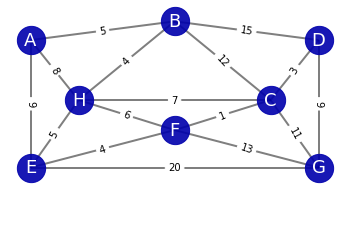

In [11]:
edgeLabels = nx.get_edge_attributes(G,'weight')

pos= {'A': [-0.75, 0.4], 'B': [0,0.9], 'C': [0.5,-1.2], 'D': [0.75, 0.4], 'E': [-0.75, -3], 'F': [0, -2], 'G': [0.75, -3], 'H': [ -0.5,-1.2]}

display_graph(G,pos,edgeLabels)

#### Obtain Minimum distance paths from source node to all nodes

* As directed, we shall use *networkX* library to ontain minimum distance path between node A and remaining nodes
* ***all_pairs_dijkstra()*** functiontakes weighted graph as input and returns all paths[*path*] for perticular node[*n*] alongwith its minimum distance to all reachable nodes[*dist*]
* Since, we have a to calculate minimum distance tree from **root node A**, we have wrapped *all_pairs_dijkstra()* in a support function **find_Distance()**
    * find_Distance() inputs diected graph *G* and root node *source*
    * It returns -
        * all nodes reachable to root node **AND**
        * minimum distance paths to the nodes from root node 

In [12]:
def find_Distance(G,source):
    paths,nodes =[],[]
    for n, (dist, path) in nx.all_pairs_dijkstra(G):
        print("Distance between nodes {} and {} : {}\t Path = {}".format(source,n,dist[source],list(reversed(path[source]))))
        paths.append(list(reversed(path[source])))
        nodes.append(n)
    return paths,nodes
tree_travrsal = ['1', '8', '2', '5', '3', '4', '6', '7']

#### Display resullts of traversal

In [13]:
paths,nodes = find_Distance(G,'A')  

Distance between nodes A and A : 0	 Path = ['A']
Distance between nodes A and B : 5	 Path = ['A', 'B']
Distance between nodes A and C : 14	 Path = ['A', 'E', 'F', 'C']
Distance between nodes A and D : 17	 Path = ['A', 'E', 'F', 'C', 'D']
Distance between nodes A and E : 9	 Path = ['A', 'E']
Distance between nodes A and F : 13	 Path = ['A', 'E', 'F']
Distance between nodes A and G : 25	 Path = ['A', 'E', 'F', 'C', 'G']
Distance between nodes A and H : 8	 Path = ['A', 'H']


#### Generate Minimum distance tree

*networkX* library does not provide built in function to generate minimum distance tree for a graph given a root node to start with.
* Hence, support function **make_minDistanceTree()** is written
* It operates on results generated by **find_Distance()** : nodes **AND** minimum distance paths for them
    * Empty graph T is created
    * All *nodes* are added to the tree
    * For each minimum distance path:
        * Add all weighted edges which make up minimum distance path in graph G $\rightarrow$ to graph T
    * Return graph T [***which is a weighted tree***]

In [14]:
def make_minDistanceTree(paths,nodes):
    T = nx.Graph()
    for node in nodes:
        T.add_node(node)

    for path in paths[1:]:
        for i in range(len(path)-1):
            if G.has_edge(path[i], path[i+1]):
                T.add_edge(path[i], path[i+1],weight= G[path[i]][path[i+1]]['weight'])
    
    return T


#### Form and display minimum ditsance tree

* $Minimum\ Distance\ Tree$ is created and displayed bellow
* Weighted bfs traversal of this tree would give any necessary minimum distance path between node and root node 
* Position of nodes is manually set for readability of users of this notebook

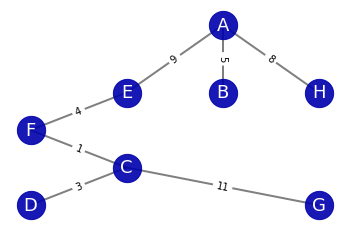

In [15]:
T = make_minDistanceTree(paths,nodes)

edgeLabels = nx.get_edge_attributes(T,'weight')

pos= {'A': [0, 0.8], 'B': [0, -1], 'C': [-0.5, -3], 'D': [-1, -4], 'E': [-0.5, -1], 'F': [-1, -2], 'G': [0.5, -4], 'H': [ 0.5, -1]}

display_graph(T,pos,edgeLabels)

<br><br>

## MINIMUM SPANNING TREE

### Generate Minimum Spanning Tree to minimise construction cost of bridges between islands
$PROBLEM$<br>

* A lake contains 8 islands; which need to be connected by bridges. Cost of constructing bridge between each possible pair of islands is proportional to path costs.
* Task is to find optimal bridges to be constructed so that overll path cost is minimised.
* Apply Prims's minimum spanning tree algorithm to find which bridges should be built to minimise total construction cost
* Run algorithm starting at node $1$
* At each step :
    * Minimum cost edge connecting new node to the MST
    * Edges in MST
<br><br>
* **Problem needs to be converted into Minimum Spanning Tree**. To start with, a graph is created out of adhascency matrix as shown bellow.
<img src="files/images/problemMST.JPG">

<br>

$ALGORITHM$<br>

function Prim_MST:<br>

Input: a connected undirected weighted graph G<br>
Output: T a minimum spanning tree based on G<br>

* visited $\leftarrow$  frandom nodeg
* while visited does not contain all nodes from G do
    * minimum $\leftarrow$  random edge (m,n) with m in visited and n not in visited and no cycle <br>
    * for all node n not in visited reachable from node m in visited do
        * if weight of edge (m, n) $<$  weight of minimum and no cycle
            * minimum $\leftarrow$  edge (m, n)<br>
        * endif<br>
    * endfor
    * add n in minimum to visited
    * add edge minimum to T
* endwhile
* return T

<br><br>

$SOLUTION$<br><br>

**FOLLOWING SOLUTION WALKS THOUGH STEPWISE EXPLORATION FOR PRIMS'S MINIMUM SPANNING TREE ALGORITHM**<br><br>
Note:<br> 
* Negative index steps [1,3,7..] are **visit steps** where an explored node with minimum weight is inducted into minimum path tree
* Positive index steps [2,4,6..] are **exploratory steps** where adjascent univisted nodes of new inducted node are viewed and their minimum distance is updated to find out nearest node

$AT\ EACH\ STAGE,\ EDGES\ WHICH\ ARE\ PART \ OF\ MST\ ARE\ SHOWN\ IN\ RED\ COLOUR$
<br><br>

***Initially, all nodes are passive, with infinite minimum distance***<br>
$[1]$<br>
Algorithm starts with root node *1*; which is marked visited<br>
$[2]$<br>
All adjascent nodes to  visited nodesare explored.This being fully connected graph, all nodes are neighbours of each other. As it turns out, nearest node is node *8*. Distance is **{1,8} : 120** <br>
$[3]$<br>
Node *8* is inducted in "visited" list<br>
$[4]$<br>
All adjascent nodes to visited nodes *1* and *8* are explored.This being fully connected graph, all nodes are neighbours of each other. As it turns out, nearest node is node *2* connected to node *8*. Distance is **{2,8} : 155** <br>
<br>
This process continuous till all nodes in graph are connected. Final edge vector of graph is:<br>
**('1', '8'): 120,$\ \ $('2', '8'): 155,$\ \ $('5', '8'): 170,$\ \ $('3', '5'): 115,$\ \ $('4', '5'): 160,$\ \ $('2', '6'): 180,$\ \ $('6', '7'): 175**


<img src="files/images/legendMST.JPG">
<img src="files/images/mst1.JPG">
<img src="files/images/mst2.JPG">
<img src="files/images/mst3.JPG">
<br><br>

### Varify solution using networkX Python package
$PROBLEM$<br>

* create an empty weighted graph, G
* add vertices (nodes) with their weights given in table 2 to G
* draw G. For the position (pos) parameter, one can adopt either the nx.spring_layout(G) method which will compute a random layout for user, or a user-defined dictionary with node as keys and values as a coordinate list or tuple,
* to compute the MST using Prim’s algorithm. As an output, print a list that contains the minimum spanning tree.
* draw the MST graph (i.e. the same graph G but after removing all unwanted edges, the edges are not included in MST).
<br><br>

$SOLUTION$

#### Create Empty graph

In [16]:
G = nx.Graph()

#### Insert nodes and weighted edges
* **Nodes** of graph are representing **Islands** in the lake
* Whereas, **distances** between all pairs of islands are reresented by **weighted edges** 

In [17]:
G.add_node('1')
G.add_node('2')
G.add_node('3')
G.add_node('4')
G.add_node('5')
G.add_node('6')
G.add_node('7')
G.add_node('8')

G.add_edge('1', '2',weight=240)
G.add_edge('1', '3',weight=210)
G.add_edge('1', '4',weight=340)
G.add_edge('1', '5',weight=280)
G.add_edge('1', '6',weight=200)
G.add_edge('1', '7',weight=345)
G.add_edge('1', '8',weight=120)
G.add_edge('2', '3',weight=265)
G.add_edge('2', '4',weight=175)
G.add_edge('2', '5',weight=215)
G.add_edge('2', '6',weight=180)
G.add_edge('2', '7',weight=185)
G.add_edge('2', '8',weight=155)
G.add_edge('3', '4',weight=260)
G.add_edge('3', '5',weight=115)
G.add_edge('3', '6',weight=350)
G.add_edge('3', '7',weight=435)
G.add_edge('3', '8',weight=195)
G.add_edge('4', '5',weight=160)
G.add_edge('4', '6',weight=330)
G.add_edge('4', '7',weight=295)
G.add_edge('4', '8',weight=230)
G.add_edge('5', '6',weight=360)
G.add_edge('5', '7',weight=400)
G.add_edge('5', '8',weight=170)
G.add_edge('6', '7',weight=175)
G.add_edge('6', '8',weight=205)
G.add_edge('7', '8',weight=305)



#### Display graph

* Graph is visualised to observe path costs involved between all nodes at a glance
* Since this is 8 node grpah, 28 bidirection weighted edges are present in the graph

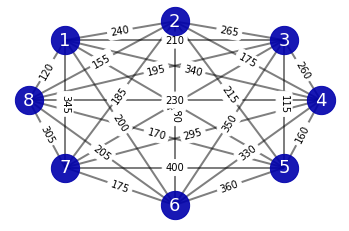

In [18]:
edgeLabels = nx.get_edge_attributes(G,'weight')

pos= {'1': [-0.75, 0.4], '2': [0,0.9], '3': [0.75, 0.4], '4': [1, -1.2], '5': [0.75, -3], '6': [0,-4], '7': [-0.75, -3], '8': [ -1,-1.2]}

display_graph(G,pos,edgeLabels)

#### Compute MST and display as a list

* $networkX$ library suggested for this exercise provides function ***minimum_spanning_tree()** to obtain MST for a given graph
* It accepts a weighted graph as positional input.
* Keyword argument 'algorithm' provides user choice to opt for ‘kruskal’, ‘prim’, or ‘boruvka’ algorithms for MST formation.

In [19]:
T=nx.minimum_spanning_tree(G,algorithm='prim')
tree_traversal =  ((list(nx.bfs_tree(T, source='1', depth_limit=4))))
print("Minimum spanning tree traversed",tree_travrsal)



Minimum spanning tree traversed ['1', '8', '2', '5', '3', '4', '6', '7']


#### Display minimum spanning tree

* Obtained MST is printed using "draw" class function of networkX library
* As can be seen, **characteristics for a Minimum Spanning Tree** are satisfied:<br>

    * ***No cycyles exist between nodes***
    * ***All nodes are connected with minimal overall path cost***

{('1', '8'): 120, ('2', '8'): 155, ('2', '6'): 180, ('3', '5'): 115, ('4', '5'): 160, ('5', '8'): 170, ('6', '7'): 175}


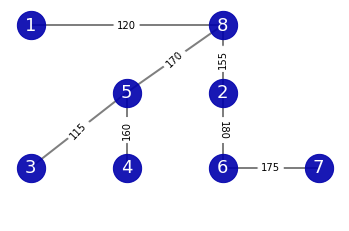

In [20]:

edgeLabels = nx.get_edge_attributes(T,'weight')
print(edgeLabels)
pos= {'1': [-1, 0.8], '2': [0, -1], '3': [-1, -3], '4': [-0.5, -3], '5': [-0.5, -1], '6': [0, -3], '7': [0.5, -3], '8': [ 0, 0.8]}


display_graph(T,pos,edgeLabels)


## Background on data traversal tehniques

### Hash table

$PROBLEM$<br>
* Draw the 11-entry hash table that results from using the hash function, h(i) = (3i+5) mod 11
* hash keys are { 12, 44, 13, 88, 23, 94, 11, 39, 20, 16,5}
* Comment on performance for chaining and linear probing algorithms for collosion handling

$SOLUTION$

#### Prepare hash Table

<img src="files/images/hashTable.JPG">

#### Chaining for collision handling

$Algorithm$<br>
* Initalise hash indices as roots for linkedlist
* For each key:
    * fetch hash
    * if a key exists in hash:
        * Edit inplace with new value<br>
    * Else:
        * Add linked list node each new key present "END" of linkedlist


<img src="files/images/chaining.JPG">

#### Linear probing for collision handling

$Algorithm$<br>
* Initalise hash as array indices 
* For each key:
    * fetch hash index
    * if hash index is empty:
        * Occupy list position
    * Else:
        * while(watchdogTimer()):
            * increment hash index
            * if hash index is empty:
                * Occupy list position
            * else:
                * continue

<img src="files/images/linearProbing.JPG">

### Conclusion:
$Chaining$<br>
* Chaining is easier to implement and nonexhaustive
* Chaining is more ronust to load factors since it can grow the size of table dynamically
* Cons:
    * It is not memory efficient
    * Access time is equal irrepsective of occupancy of hashing table
    
$Linear\ Probing$<br>
* Linear probing is used when freequency of keys is known/ is uniform
* It provides better cache performance since locality of reference works in the favour of entire table reciding in cache
* Memory slots are avaiable to occupy though the hash for key is different
* It can provide $O(1)$ complexity when slot is available
* Cons:
    * Prone to clustering and loading, need resizing which often adds redundancy
    * Needs more computations to find empty hash slot and match against probabilities of keys for that hash
    

## Time complexity of bubble, quick and merge sort algorithms

$PROBLEM$
* Obtain and compare runtimes for stated sorting algorithms
* Inputs are reverse sroted integer arrays of successively increasing size
    * n = 10 $\rightarrow$[9,8,7,...0]
    * n = 65 $\rightarrow$[64,63,62....19,18,17,..2,1,0] etc.
* Functions provided in Lab 6 to be used used to obtain bubble quick and merge sorted outcomes 
* Plot and save graphs of running time vs length of imput array 
<br>


$SOLUTION$

**Functions provided in LAB 6 are used used to obtain bubble quick and merge sorted outcomes**

In [2]:
'''
python implementation of bubble sort
'''
def bubbleSort(arr):
    arr_size = len(arr)
    for i in range(arr_size):
        for j in range(i, arr_size):
            if arr[i] > arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
    return arr

In [3]:
'''
Python implementation of quickSort.
'''

def partition(arr, low, high):
    """Return a pivot element for quickSort."""
    key = arr[high]
    pivot = low
    for i in range(low, high):
        if arr[i] <= key:
            arr[i], arr[pivot] = arr[pivot], arr[i]
            pivot += 1

    arr[pivot], arr[high] = arr[high], arr[pivot]
    return pivot


def quickSort(arr, low=0, high=None):
    if high is None:
        high = len(arr)-1
    
    if high < low:
        return
    else:
        pivot = partition(arr, low, high)
        quickSort(arr, low, pivot-1)
        quickSort(arr, pivot+1, high)

In [4]:
'''
Merge sort implemented in Python
'''
tree_travrsal = ['1', '8', '2', '5', '3', '4', '6', '7']

def merge(left, right):
    result = []
    left_idx, right_idx = 0, 0
    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] <= right[right_idx]:
            result.append(left[left_idx])
            left_idx += 1
        else:
            result.append(right[right_idx])
            right_idx += 1
 
    if left:
        result.extend(left[left_idx:])
    if right:
        result.extend(right[right_idx:])
    return result


def mergeSort(arr):
    if len(arr) <= 1:
        return arr
 
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
 
    left = mergeSort(left)
    right = mergeSort(right)
    return list(merge(left, right))

### PREPARE INPUTS

**input_Array()** <br>
INPUT: accepts integer stating num = length of array<br>
OUTPUT: returns array of integers of length = num containing [num, num-1,num-2....0] 

In [5]:
# Return a revered array of length equal "num"
def input_Array(num,revered = True):
    num = int(num)
    if revered and num > 0:
        return (list(reversed(list(range(num)))))




**algoTime()** <br>
INPUT: accepts sorting function as argument<br>
OUTPUT:<br> 
1 list containg integers [eg. 10,15,20...150]  **AND**<br>
1 list containg sorting time taken by  sorting function to sort a revered integer list of corresponding length

In [6]:
def algoTime(algo,nStart=10,nEnd=100,nStep=5):
    execTime={}
    
    for n in range(nStart,nEnd,nStep):
        # Calculate execution time averaging 100 times for a sorting algorithm in microseconds 
        # Store result for each n as value to key "n" in dictionary execTime
        execTime[n] = timeit.timeit(algo+"("+input_Array.__name__+"("+str(n)+"))",setup = "from __main__ import "+algo+",input_Array", number = 100)/(1e-06)
        
    n,exT =  list(execTime.keys()),list(execTime.values())
    return n,exT



### Driver code() <br>
* Plot results for each sorting algorithm
* Integer range used are hardcoded for demonstration purpose

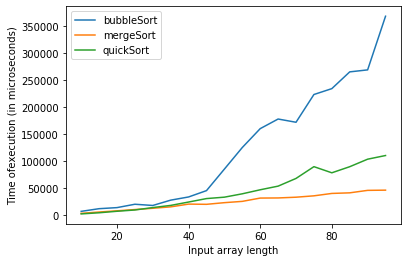

In [7]:
algorithms = ["bubbleSort","mergeSort","quickSort"]
for algo in algorithms:
    result = algoTime(algo)
    plt.plot(result[0],result[1],label=algo)
    
plt.xlabel("Input array length")
plt.ylabel("Time ofexecution (in microseconds)")
plt.legend()
plt.savefig('Execution Time - Sorting Algorithms.png')

### Conclusion

* $Bubble\ sort$<br>
is a series of comparison-exchanges which works by swapping adjacent elements if they are not in proper order. Moreover, in Big O notation, bubble sort’s worst-case running time is $O(n^2)$.
* $Quick\ sort$<br> 
    * Best Case for quick sort is When pivot value is the middle element, picked during the partition process. So, the Big O notation for best case is $O(nlog(n))$.<br>
    *The worst case occurs when the pivot value consists of the greatest or smallest element
in array. Here, we have one element less than previous one at each level. Hence, the
running time T(n) is denoted by equation: T(n) = cn *n. Moreover, in Big O notation, quick
sort’s worst-case running time is $O(n^2)$.
* $Merge\ Sort$<br>
*Like binary search, division can be represented as logarithmic opeartion -  which can be seen as $log(n)$ and in merge sort the function divides the list into n elements. Hence during 3 cases (worst, average and best) the complexity operation is the same as $O(nlog(n))$

<br>

General running time observations for reversed  set of inputs is : T(Merge) < T(Quick) < T(Bubble)